In [144]:
%autosave 0

Autosave disabled


<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 14px; 
            font-weight: 500;
            padding: 30px 5px 30px 5px; 
            border: 30px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>(Custom CSS files are not reliable for controlling Jupyter font style. To establish the same appearance as the original notebook, depend on the browser to control the font, by setting the desired font faces in the browser settings. For example, Chrome 135 or Firefox 134 can do this. In this notebook series, Bookerly font is for markdown and Monaco is for code.)
     
     
     

</font>                 
</div>

<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 20px 5px 20px 5px; 
            border: 30px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>**Chapter 31-1: PDEs Using Boundary Element Method**. 
 
The boundary element method (BEM) is a numerical computational method of solving linear partial differential equations which have been formulated as integral equations (i.e. in boundary integral form), including fluid mechanics, acoustics, electromagnetics (where the technique is known as method of moments or abbreviated as MoM), fracture mechanics, and contact mechanics.

The integral equation may be regarded as an exact solution of the governing partial differential equation. The boundary element method attempts to use the given boundary conditions to fit boundary values into the integral equation, rather than values throughout the space defined by a partial differential equation. Once this is done, in the post-processing stage, the integral equation can then be used again to calculate numerically the solution directly at any desired point in the interior of the solution domain.

BEM is applicable to problems for which Green's functions can be calculated. These usually involve fields in linear homogeneous media. This places considerable restrictions on the range and generality of problems to which boundary elements can usefully be applied. Nonlinearities can be included in the formulation, although they will generally introduce volume integrals which then require the volume to be discretized before solution can be attempted, removing one of the most often cited advantages of BEM. A useful technique for treating the volume integral without discretizing the volume is the dual-reciprocity method. The technique approximates part of the integrand using radial basis functions (local interpolating functions) and converts the volume integral into a boundary integral after collocating at selected points distributed throughout the volume domain (including the boundary). In the dual-reciprocity BEM, although there is no need to discretize the volume into meshes, unknowns at chosen points inside the solution domain are involved in the linear algebraic equations approximating the problem being considered.

The Green's function elements connecting pairs of source and field patches defined by the mesh form a matrix, which is solved numerically. Unless the Green's function is well behaved, at least for pairs of patches near each other, the Green's function must be integrated over either or both the source patch and the field patch. The form of the method in which the integrals over the source and field patches are the same is called "Galerkin's method". Galerkin's method is the obvious approach for problems which are symmetrical with respect to exchanging the source and field points.  

In the Handbook of Differential Equations, Zwillinger says the boundary element method is applicable to linear elliptic differential equations, but that it is also sometimes applicable to parabolic, hyperbolic, or nonlinear elliptic equations.<BR>
     
     
     

</font>                 
</div>

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 15px 5px 10px 5px;
            border: 30px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>1. Solve the following PDE:

$$u_t = \alpha^2 u_{xx}\, ,\quad 0 < x < 1\, , 0 < t < \infty\, ,$$

with boundary conditions

$$u(0, t) = u(1, t) = 0\, ,\quad  0\leq t\leq \infty$$

and initial conditions

$$ u(x, 0) = \phi(x), \quad 0 \leq x \leq 1\, .$$

(The problem and developed answer is taken from the repository of Nicolás Guarin.)



</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>One fork of the boundary element method is that of separation of variables. A decomposition additive or multiplicative solution for the above-posed partial differential equation is proposed.

If the function $u(x, y)$ is sought, then it would be something like:

- $u(x, y) = X(x) Y(x)$;    or
- $u(x, y) = X(x) + Y(y)$.


The method is usually used for linear differential equations in their multiplicative form, so this will be assumed here.


This method can be used to solve value problems on the boundary with the following features:


1. The PDE is linear and homogeneous (not necessarily with constant coefficients).
   
2. The boundary conditions are as follows:

   \begin{align*}
   &\alpha u_x(0, t) + \beta u(0, t) = 0\, ,\\
   &\gamma u_x(1, t) + \delta u(1, t) = 0\ ,
   \end{align*}
   
   with $\alpha$, $\beta$, $\gamma$ and $\delta$ constant.
     
     
     

</font>                 
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>In this method we look for solutions of the form

$$u(x, t) = X(x) T(t)\, ,$$

i.e. for the given boundary conditions, the form of the solution will be the same and will scale over time. This is shown in the following figure.


<img src="image01.svg" />
     
In the end we will end up with a set of solutions $u_n(x, t) = X_n(x) T_n(t)$, and the most general solution would be of the form

$$u(x, t) = \sum_{n=1}^{\infty} A_n X_n(x) T_n(t)\, .$$

The method is illustrated step by step below.
     
     

</font>                 
</div>

<div style="background: #FEFEFE;
            font-family: Bookerly;
            font-size: 19px; 
            font-weight: 600;"
      
 <font color=#2020CC>Step 1. Find the elementary solutions
 </font>
 </div>
     

</font>                 
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>For this step we substitute $X(x) T(t)$ in the PDE and get

$$X(x) T'(t) = \alpha^2 X''(x) T(t)\, .$$

Where the $'$ denotes total derivatives since each function is of a variable in this case. Now divide both sides of the equation by $X(x) T(t)$, to get

$$\frac{T'(t)}{\alpha^2 T(t)} = \frac{X''(x)}{X(x)}\, ,$$

and we get the **separate variables**.



This point is key. We can notice that we have on the left side a $t$ function and on the right side a $x$ function. However, these two functions are the same. Therefore, this must be equal to a constant.



Treating as a constant, we get

$$\frac{T'(t)}{\alpha^2 T(t)} = \frac{X''(x)}{X(x)} = k\, ,$$

or

\begin{align*}
&T' - k \alpha^2 T = 0\, ,\\
&X'' - kX = 0\, ,
\end{align*}

and now we can solve the two resulting ODEs.

In this case we want $T(t)$ to go to zero when $t\rightarrow \infty$, Therefore we want a negative constant, $k = -\lambda^2$. And we get

\begin{align*}
&T' +  \lambda^2 \alpha^2 T = 0\, ,\\
&X'' - \lambda^2 X = 0\, .
\end{align*}

The solution of these equations is

\begin{align*}
&T(t) = C e^{-\lambda^2 \alpha^2 t}\, ,\\
&X(x) = A \sin\lambda x + B\cos\lambda x\, ,
\end{align*}

and then


$$u(x, t) = e^{-\lambda^2\alpha^2 t}[A \sin\lambda x + B \cos\lambda x]\, ,$$

amounts to a solution.

We can verify that these types of functions satisfy the differential equation.
     

</font>                 
</div>

In [145]:
%matplotlib notebook



In [146]:
from sympy import *



In [147]:
init_session()



IPython console for SymPy 1.11.1 (Python 3.9.13-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



In [148]:
lamda, alpha = symbols("lambda alpha")
A, B = symbols("A B")



In [149]:
u = exp(-lamda**2 * alpha**2 * t)*(A*sin(lamda*x) + B*cos(lamda*x))
u



                             2  2  
                           -α ⋅λ ⋅t
(A⋅sin(λ⋅x) + B⋅cos(λ⋅x))⋅ℯ        

In [150]:
u.diff(t) - alpha**2 * u.diff(x, 2)



0

<div style="background: #FEFEFE;
            font-family: Bookerly;
            font-size: 19px; 
            font-weight: 600;"
      
 <font color=#2020CC>Step 2: Solutions that satisfy boundary conditions
 </div>
     

</font>                 
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Of all the solutions that satisfy the PDE, we are interested in those that satisfy the boundary conditions. When evaluating them in the condition of the LHS we get the following

$$u(0, t) = B e^{-\lambda^2 \alpha^2 t} = 0\, ,$$

which implies $B=0$. For the condition on the right we get

$$u(1, t) = A e^{-\lambda^2 \alpha^2 t} \sin \lambda = 0\, .$$

In this case we have two possibilities. If $A = 0$, then the solution to the problem would be $u = 0$, which is not of interest. The other option would be

$$\sin \lambda = 0\, ,$$

which implies

$$\lambda = \pm \pi, \pm 2\pi, \pm 3\pi, \cdots
 = \pm n\pi\quad \forall n\in\mathbb{N}\, .$$
 
And our solutions that meet the boundary conditions would be

$$u_n(x, t) = A_n e^{-(n \pi \alpha)^2 t} \sin(n\pi x)\quad \forall n\in\mathbb{N}\, .$$
</font>                 
</div>

In [151]:
un = A*exp(-(n*pi*alpha)**t)*sin(n*pi*x)
un



           t           
   -(π⋅α⋅n)            
A⋅ℯ         ⋅sin(π⋅n⋅x)

In [152]:
un.subs(x, 0)



0

In [153]:
un.subs(x, 1)



0

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>We can see that we only determined 1 of the constants. With the other condition we find what should be the values of the constant of separation that made the conditions of the border satisfactory. This is usual for this type of problem since we are solving a problem of eigenvalues. In this case the eigenvalues are given by $\lambda_n^2 = (n\pi)^2$ and the eigenvectors (or proper functions) are given by $X_n = \sin(\lambda_n x)$. This is a **Sturm-Liouville** problem. And it's common it appears as shown in the process of separation of variables in the spatial problem part.

</font>                 
</div>

<div style="background: #FEFEFE;
            font-family: Bookerly;
            font-size: 19px; 
            font-weight: 600;"
      
 <font color=#2020CC>Step 3: Solutions that satisfy boundary conditions and initial conditions
 </div>
     

</font>                 
</div>


<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Since we have a linear problem and find infinite particular solutions, the most general solution would be


$$u(x, t) = \sum_{n=1}^\infty A_n e^{-(n\pi \alpha)^2t} \sin(n\pi x)\, .$$


To find the coefficients $A_n$ we use the initial condition


$$u(x, 0) = \phi(x)\, ,$$

that is,

$$\phi(x) = \sum_{n=1}^\infty A_n \sin(n\pi x)\, .$$


Which, as we can see, is the representation of the function $\phi(x)$ in the base $\{\sin(n\pi x)| n\in\mathbb{N}\}$.

Therefore, the solution is

$$u(x, t) = \sum_{n=1}^\infty A_n e^{-(n\pi\alpha)^2 t}\sin(n\pi x)\, ,$$

with

$$A_n = 2\int\limits_{0}^{1} \phi(x) \sin(n\pi x)\mathrm{d}x\, .$$


To find this last expression, we multiply


$$\phi(x) = \sum_{n=1}^\infty A_n \sin(n\pi x)\, ,$$


by $\sin(m\pi x)$ on both sides and integrate between 0 and 1. When using orthogonality we arrive at the expected coefficients.




We can say that in this problem we find a basis for solutions of the problem of values at the border and that we can then express its solution as a linear combination of these functions.

</font>                 
</div>

<div style="background: #FEFEFE;
            font-family: Bookerly;
            font-size: 19px; 
            font-weight: 600;"
      
 <font color=#2020CC>Specific example
 </div>
     

</font>                 
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Suppose that

$$\phi(x) = \frac{1}{2} - \left|x - \frac{1}{2}\right| \, $$

</font>                 
</div>


In [154]:
phi = S(1)/2 - Abs(x - S(1)/2)



<IPython.core.display.Javascript object>


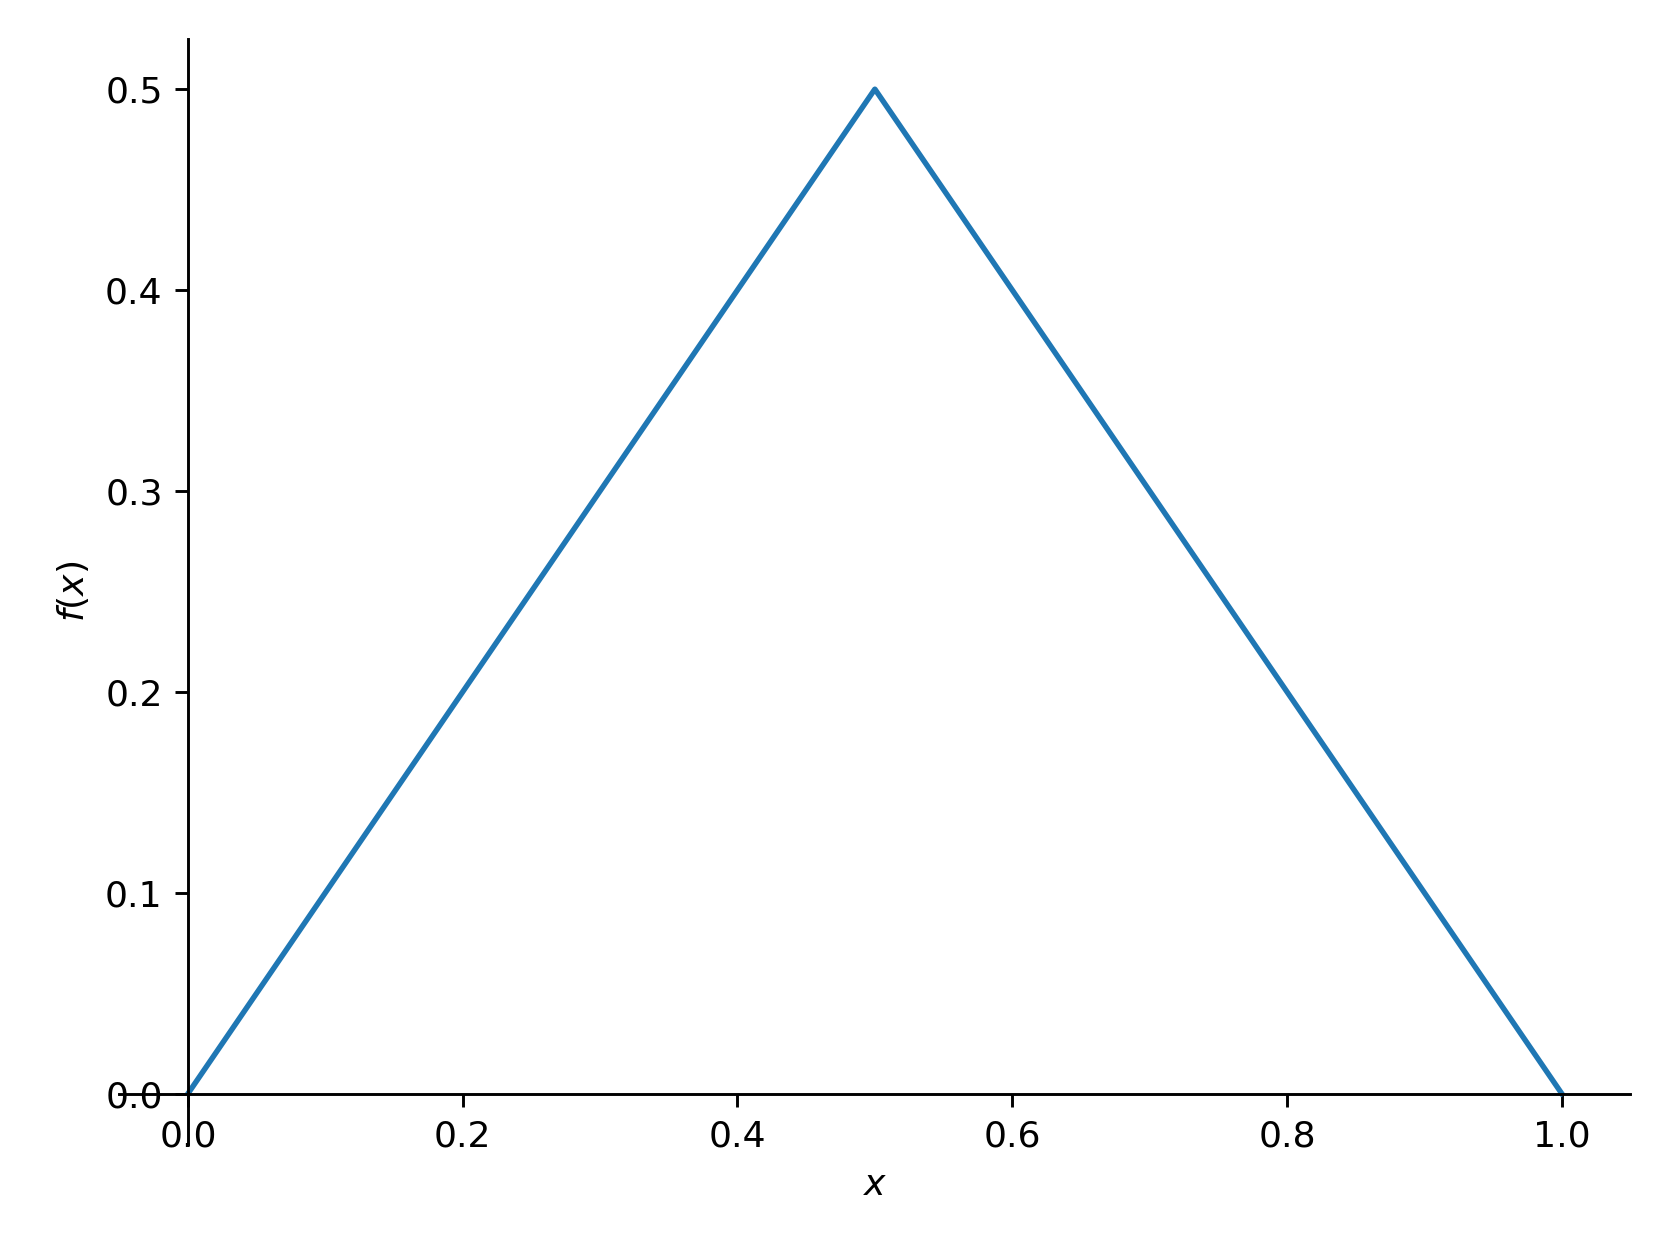

In [155]:
plot(phi, (x, 0, 1))



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Then, the coefficient would be given by the following:
</font>                 
</div>

In [156]:
n = symbols("n", positive=True, integer=True)
An = 2*integrate(phi*sin(n*pi*x), (x, 0, 1))
An



     ⎛π⋅n⎞
4⋅sin⎜───⎟
     ⎝ 2 ⎠
──────────
   2  2   
  π ⋅n    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Our overall solution would be as follows:
</font>                 
</div>

In [157]:
u_final = summation(An*exp(-(n*pi*alpha)**2*t)*sin(n*pi*x), (n, 1, oo))
u_final



  ∞                                      
______                                   
╲                                        
 ╲                                       
  ╲         2  2  2                      
   ╲      -π ⋅α ⋅n ⋅t    ⎛π⋅n⎞           
    ╲  4⋅ℯ           ⋅sin⎜───⎟⋅sin(π⋅n⋅x)
    ╱                    ⎝ 2 ⎠           
   ╱   ──────────────────────────────────
  ╱                   2  2               
 ╱                   π ⋅n                
╱                                        
‾‾‾‾‾‾                                   
n = 1                                    

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>We can verify that it satisfies the differential equation.
</font>                 
</div>

In [158]:
simplify(u_final.diff(t) - alpha**2 * u_final.diff(x, 2))



0

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>We can verify the boundary conditions.
</font>                 
</div>

In [159]:
simplify(u_final.subs(x, 0))



0

In [160]:
simplify(u_final.subs(x, 1))



0

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>And the initial conditions
</font>                 
</div>

In [161]:
u_final.subs(t, 0)



  ∞                        
_____                      
╲                          
 ╲         ⎛π⋅n⎞           
  ╲   4⋅sin⎜───⎟⋅sin(π⋅n⋅x)
   ╲       ⎝ 2 ⎠           
   ╱  ─────────────────────
  ╱            2  2        
 ╱            π ⋅n         
╱                          
‾‾‾‾‾                      
n = 1                      

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 15px 5px 10px 5px;
            border: 30px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>2. Solve the 2D poisson equation in the square [0, 1] x [0, 1] with homogenious Dirichlet boundary conditions on all boundaries.





</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The language in which this is cast is not Python but rather Octave.
</font>                 
</div>

<div style="background: #FEFEFE;
            font-family: Bookerly;
            font-size: 19px; 
            font-weight: 600;"
      
 <font color=#2020CC>Displaying the execution process.
 </font>
 </div>
     

</font>                 
</div>

In [163]:
clear all
close all
hold on

%===================================================
% Explicit multigrid solution for the 2D Poisson eqn
% Lf+g=0 in the square [a, b] x [a, b]
%
% with the homogeneous Dirichlet BC all around
%
% fine grid size is N=2^ndiv
%===================================================

a=0.0;
b=1.0;
ndiv=6;
nu1=3;
nu2=3;
ncycle=3;  % number of cycles

L=b-a;
N=2^ndiv;
h=L/N;
Nx=N;
Ny=N;

%---
% initialize the fine-grid solution
%---

for i=1:Nx+1
 x(i)=a+(i-1)*h;
end
for j=1:Ny+1
 y(j)=a+(j-1)*h;
end

f=zeros(Nx+1,Ny+1);

for j=2:Ny
 for i=2:Nx
   f(i,j)=0.0;
   f(i,j)=0.1*rand-0.05;
 end
end

%---
% graph
%---

%mesh(x,y,f);

hold on
set(gca,'fontsize',15)
xlabel('x','fontsize',15)
ylabel('y','fontsize',15)
zlabel('f','fontsize',15)
axis([0 1 -0.1 1])
box

%---
% right-hand side of Af=b
%---

for j=1:Ny+1
 for i=1:Nx+1
  g(i,j)=exp(-2*x(i));
  g(i,j)=sin(2*pi*x(i)/L);
  g(i,j)=1.0;
  b(i,j)=h*h*g(i,j);
 end
end

%--------
% prepare
%--------

esave=zeros(ndiv,Nx+1,Nx+1);   % save the solution (f) and the error (e)
rsave=zeros(ndiv,Nx+1,Ny+1);   % save the residual (r)

%=========
% V cycles
%=========

for cycle=1:ncycle

%---
% presmoothing
%---

%nu1=200;
f = mg_gs(nu1,Nx,Ny,f,b);
%mesh(x,y,f);

%--
% residual
%--

 r=zeros(Nx+1,Ny+1);

 for j=2:Ny
  for i=2:Nx
   r(i,j)= f(i+1,j)+f(i-1,j)-4.0*f(i,j)+f(i,j+1)+f(i,j-1)+b(i,j);
  end
 end

 esave(1,:,:)=f;
 rsave(1,:,:)=r;

%----
% down to coarse
%----

 Nsys=N;

 for level=2:ndiv

  [xhalf, yhalf, rhalf] = mg_restrict(Nsys,Nsys,x,y,r);
  Nsys=Nsys/2;
  clear x r e;
  x=xhalf; y=yhalf; r=rhalf; e=zeros(Nsys+1,Nsys+1);

%---
  if(Nsys>2)
%---
  e = mg_gs(nu1,Nsys,Nsys,e,r);
%---
  else
%---
  e(2,2)=r(2,2)/4.0;
%---
  end
%---

  for j=2:Nsys
   for i=2:Nsys
    r(i,j)= e(i+1,j)+e(i-1,j)-4.0*e(i,j)+e(i,j+1)+e(i,j-1)+r(i,j);
   end
  end

  for i=1:Nsys+1
   for j=1:Nsys+1
    esave(level,i,j)=e(i,j);
    rsave(level,i,j)=r(i,j);
   end
  end

 end

%----
% up to fine
%----

  for level=ndiv-1:-1:1
   [xdouble, ydouble, edouble] = mg_prolongate(Nsys,Nsys,x,y,e);
   x=xdouble; y=ydouble;
   Nsys=2*Nsys;
   for k=1:Nsys+1
    for l=1:Nsys+1
     e(k,l) = esave(level,k,l)+edouble(k,l);
     r(k,l) = rsave(level,k,l);
   end
   end
  if(nu2>0)
   e = mg_gs(nu2,Nsys,Nsys,e,r);
   end
 end

 f=e;

%---
end
%---

 mesh(x,y,f);

    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 148)

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>And the resulting plot in Octave, saved in svg format, looks like:
</font>                 
</div>

<img src="image02.svg" />

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 15px 5px 10px 5px;
            border: 30px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>4. Solve the steady-state temperature distribution over the cross-section of a square chimney wall with homogeneous Dirichlet boundary conditions on all boundaries.





</font>
</div>

In [ ]:
clear all
close all

%===============
% chimney_s
%
% Steady-state temperature distribution
% over the cross-section
% of a square chimney wall
% with Dirichlet BC
%===============

%--------------------------
% prameters and conditions:
%--------------------------

T1=300;         % temperature of inside wall in deg C
T2=10;          % temperature of outside wall in deg C
a=0.5;          % thickness of chimney wall in meters
k = 0.15;       % conductivity
tolerance = 0.00001;

N=32;   % number of nodes in x-direction
maxiter=3000;% maximum # of iterations

%--------
% prepare
%--------


M=N/2;  %  number of nodes in y-direction
b=2*a;

dx=b/N;
dy=a/M;

beta=(dx/dy)^2;
beta1=2.0*(1.0+beta);

%--------------
% initial guess
%--------------

for i=1:N+1
   for j=1:M+1
      T(i,j)=T2;
   end
end

%--------------------
% boundary conditions
%--------------------

for j=1:M+1
   T(1,j)=T2;          % Dirichlet on left edge (outer wall),
   T(N+2,j)=T(N,j);     % and right edge (x=b; also using symmetry)
end

for i=1:M+1
   T(i,1)=T(M+1,M+2-i); % lower edge (from 0 to a; using symmetry)
end

for i=1:N+1     % Dirichlet b.c. and on upper edge (outer wall)
   T(i,M+1)=T2;
end

for i=M+1:N+1   % ...and also on lower edge (bordering inner
   T(i,1)=T1;   % wall; from a to b)
end

%-----------
% iterations
%-----------

for n=1:maxiter         % iterate until convergence

   correction = 0.0;

   for i=2:N+1  % central finite-diff discretization
      for j=2:M         % del^2(T)=0 combined w/ point-Gauss-Siedel
        Told = T(i,j);
        T(i,j)=(T(i+1,j)+T(i-1,j)+beta*(T(i,j+1)+T(i,j-1)))/beta1;
        diff = abs(T(i,j)-Told);
          if (diff>correction)
           correction = diff;
         end
      end
   end

   for i=1:M+1          % reset the bottom (from 0 to a)
      T(i,1)=T(N/2+1,M+2-i);
   end
   for j=1:M+1                  % reset the right edge
      T(N+2,j)=T(N,j);
   end

  correction
  if(correction<tolerance) break; end;

end

%------------------
% end of iterations
%------------------

for i=1:N+1             % set up plotting vectors
  X(i)=dx*(i-1);
end
for j=1:M+1
  Y(j)=dy*(j-1);
end

for i=1:N+1
   X1(i)=4*a-X(i);
end

%---------
% plotting
%---------

hold on

mesh(X,Y,T(1:N+1,:)')   % plotting, labelling, and formatting
mesh(X1,Y,T(1:N+1,:)')
mesh(Y+3.0*a,X-3*a,T(1:N+1,:))
mesh(Y+3.0*a,X1-3*a,T(1:N+1,:))
mesh(X,-2*a-Y,T(1:N+1,:)')
mesh(X1,-2*a-Y,T(1:N+1,:)')
mesh(a-Y,X-3*a,T(1:N+1,:))
mesh(a-Y,X1-3*a,T(1:N+1,:))

xlabel('x (m)','fontsize',15)
ylabel('y (m)','fontsize',15)
zlabel('T (C)','fontsize',15)
set(gca,'fontsize',15)

%title('Temperature over the cross-section of chimney wall')
%axis([0 2.0 0 0.0 0 2.0])
view(-80,40)

%------------------------------------
% compute the flux on the outer wall
%------------------------------------

%---
% top segment:
%---

for i=1:N+1
 flux_top(i) = -k*(T(i,M+1)-T(i,M))/dy;
end

%------------------------------------
% build the flux around the outer wall
%------------------------------------

Ic = 1;  % counter

fluxo(1)=flux_top(1);
perimo(1)=0;
xo(1)=0;
yo(1)=a;

for i=2:N+1
 Ic=Ic+1;
 fluxo(Ic)=flux_top(i);
 perimo(Ic)=perimo(Ic-1)+dx;
 xo(Ic)=xo(Ic-1)+dx;
 yo(Ic)=yo(Ic-1);
end
for i=2:N+1
 Ic=Ic+1;
 fluxo(Ic)=flux_top(N+2-i);
 perimo(Ic)=perimo(Ic-1)+dx;
 xo(Ic)=xo(Ic-1)+dx;
 yo(Ic)=yo(Ic-1);
end
for j=2:N+1
 Ic=Ic+1;
 fluxo(Ic)=flux_top(j);
 perimo(Ic)=perimo(Ic-1)+dy;
 xo(Ic)=xo(Ic-1);
 yo(Ic)=yo(Ic-1)-dy;
end
for j=2:N+1
 Ic=Ic+1;
 fluxo(Ic)=flux_top(N+2-j);
 perimo(Ic)=perimo(Ic-1)+dy;
 xo(Ic)=xo(Ic-1);
 yo(Ic)=yo(Ic-1)-dy;
end
for i=2:N+1
 Ic=Ic+1;
 fluxo(Ic)=flux_top(i);
 perimo(Ic)=perimo(Ic-1)+dx;
 xo(Ic)=xo(Ic-1)-dx;
 yo(Ic)=yo(Ic-1);
end
for i=2:N+1
 Ic=Ic+1;
 fluxo(Ic)=flux_top(N+2-i);
 perimo(Ic)=perimo(Ic-1)+dx;
 xo(Ic)=xo(Ic-1)-dx;
 yo(Ic)=yo(Ic-1);
end
for j=2:N+1
 Ic=Ic+1;
 fluxo(Ic)=flux_top(j);
 perimo(Ic)=perimo(Ic-1)+dy;
 xo(Ic)=xo(Ic-1);
 yo(Ic)=yo(Ic-1)+dy;
end
for j=2:N+1
 Ic=Ic+1;
 fluxo(Ic)=flux_top(N+2-j);
 perimo(Ic)=perimo(Ic-1)+dy;
 xo(Ic)=xo(Ic-1);
 yo(Ic)=yo(Ic-1)+dy;
end

%-----------------------------------
% compute the flux on the inner wall
%-----------------------------------

%------------
% top segment 
%------------

for i=1:M+1
 flux_top(i) = -k*(T(M+i,2)-T(M+i,1))/dy;
end

%------------------------------------
% build the flux around the inner wall
%------------------------------------

Ic = 1;  % counter
fluxi(1)=flux_top(1);
perimi(1)=0;
xi(1)=a;
yi(1)=0;

for i=2:M+1
 Ic=Ic+1;
 perimi(Ic)=perimi(Ic-1)+dx;
 fluxi(Ic)=flux_top(i);
 xi(Ic)=xi(Ic-1)+dx;
 yi(Ic)=yi(Ic-1);
end
for i=2:M+1
 Ic=Ic+1;
 perimi(Ic)=perimi(Ic-1)+dx;
 fluxi(Ic)=flux_top(M+2-i);
 xi(Ic)=xi(Ic-1)+dx;
 yi(Ic)=yi(Ic-1);
end
for j=2:M+1
 Ic=Ic+1;
 perimi(Ic)=perimi(Ic-1)+dy;
 fluxi(Ic)=flux_top(j);
 xi(Ic)=xi(Ic-1);
 yi(Ic)=yi(Ic-1)-dy;
end
for j=2:M+1
 Ic=Ic+1;
 perimi(Ic)=perimi(Ic-1)+dy;
 fluxi(Ic)=flux_top(M+2-j);
 xi(Ic)=xi(Ic-1);
 yi(Ic)=yi(Ic-1)-dy;
end
for i=2:M+1
 Ic=Ic+1;
 fluxi(Ic)=flux_top(i);
 perimi(Ic)=perimi(Ic-1)+dx;
 xi(Ic)=xi(Ic-1)-dx;
 yi(Ic)=yi(Ic-1);
end
for i=2:M+1
 Ic=Ic+1;
 perimi(Ic)=perimi(Ic-1)+dx;
 fluxi(Ic)=flux_top(M+2-i);
 xi(Ic)=xi(Ic-1)-dx;
 yi(Ic)=yi(Ic-1);
end
for j=2:M+1
 Ic=Ic+1;
 fluxi(Ic)=flux_top(j);
 perimi(Ic)=perimi(Ic-1)+dy;
 xi(Ic)=xi(Ic-1);
 yi(Ic)=yi(Ic-1)+dy;
end
for j=2:M+1
 Ic=Ic+1;
 fluxi(Ic)=flux_top(M+2-j);
 perimi(Ic)=perimi(Ic-1)+dy;
 xi(Ic)=xi(Ic-1);
 yi(Ic)=yi(Ic-1)+dy;
end

figure
hold on
%title('Wall flux')
%plot(perimo,fluxo,perimi,fluxi,'--');
%legend('outer','inner')
%xlabel('Perimeter (m)','fontsize',15)
%ylabel('flux (Watt)','fontsize',15)
plot3(xo,yo,zeros(size(xo)))
plot3(xo,yo,fluxo)
plot3(xi,yi,zeros(size(xi)),'r')
plot3(xi,yi,fluxi,'r')
set(gca,'fontsize',15)
xlabel('x(m)','fontsize',15)
ylabel('y(m)','fontsize',15)
zlabel('flux (Watt)','fontsize',15)



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Again the plot is saved in .svg format in Octave:
</font>                 
</div>

<img src="image03.svg" />

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 15px 5px 10px 5px;
            border: 30px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>5. Solve the convection equation using a particle perspective.





</font>
</div>

In [ ]:
clear all
close all

%=====================
% particle solution of 
% the convection equation
%=====================

N  = 2*2*64;
a  =-10;
b  = 10;
Dt = 0.0010;

%---
% prepare
%---

Dx = (b-a)/N;

%---
% initial condition
%---

for i=1:N+1
 x(i) = a+(i-1)*Dx;

 F(i) = tanh(x(i));
 F(i) = exp(-x(i)*x(i));

 v(i) = F(i)*F(i);
 v(i) = 1.0;
 v(i) = tanh(x(i));
 v(i) = F(i); % Burgers

end

time = 0.0;

%-----
for istep=1:30000
%-----

 x = x + Dt*v;

 time = time + Dt;

 if(istep==1)
  Handle1 = plot(x,F,'ko-');
  set(Handle1, 'erasemode','xor');
  axis([-2 2 -0.0 1.2])
% axis([-2 2 -1.2 1.2])
  xlabel('x','fontsize',15)
  ylabel('f','fontsize',15)
  set(gca,'fontsize',15)
 else
  set(Handle1,'XData',x,'YData',F);
  pause(0.01)
  drawnow
 end

%-----
end
%-----



<img src="image04.svg" />

In [ ]:
#This cell is simply for PDF spacing when using the Tabloid page size format.










<img src="image05.svg" />

<div style="background: #FFE3CC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 15px 5px 10px 5px;
            border: 30px solid #FFE3CC;  
            margin-left: 1px;
            margin-right: 1px;"
     
<font color='blue'>6. Solve Laplace's equation using Dirichlet boundary conditions in a disk-like domain and 3-node triangles.





</font>
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Continuing to work in Octave:
</font>                 
</div>

In [ ]:
close all
clear all

%========================================
% CODE lapl3_d
%
% Solution of Laplace's equation
% with the Dirichlet boundary condition
% in a disk-like domain
% using 3-node triangles
%========================================

%-----------
% input data
%-----------

ndiv = 3;  % discretization level

%------------
% triangulate
%------------

[ne,ng,p,c,efl,gfl] = trgl3_disk (ndiv);
% [ne,ng,p,c,efl,gfl] = trgl3_delaunay;

%-------
% deform
%-------

defx = 0.6;
defx = 0.0;

for i=1:ng
 p(i,1)=p(i,1)*(1.0-defx*p(i,2)^2 );
end

%-----------------------------------------
% specify the Dirichlet boundary condition
%-----------------------------------------

for i=1:ng
 if(gfl(i,1)==1)
   gfl(i,2) = sin(pi*p(i,2));    % example
   gfl(i,2) = p(i,1);            % another example
   gfl(i,2) = p(i,1)^2;            % another example
   gfl(i,2) = p(i,1)*sin(0.5*pi*p(i,2));   % another example
 end
end

%-------------------------------------
% assemble the global diffusion matrix
%-------------------------------------

gdm = zeros(ng,ng); % initialize

for l=1:ne          % loop over the elements

% compute the element diffusion matrix

j=c(l,1); x1=p(j,1); y1=p(j,2);
j=c(l,2); x2=p(j,1); y2=p(j,2);
j=c(l,3); x3=p(j,1); y3=p(j,2);

[edm_elm] = edm3 (x1,y1,x2,y2,x3,y3);

   for i=1:3
     i1 = c(l,i);
     for j=1:3
       j1 = c(l,j);
       gdm(i1,j1) = gdm(i1,j1) + edm_elm(i,j);
     end
   end
end

% disp (gdm);

%---------------------------------------------
% set the right-hand side of the linear system
% and implement the Dirichlet boundry condition
%----------------------------------------------

for i=1:ng
 b(i) = 0.0;
end

for j=1:ng
 if(gfl(j,1)==1) 
   for i=1:ng 
    b(i) = b(i) - gdm(i,j)*gfl(j,2);
    gdm(i,j)=0; gdm(j,i)=0;
   end
   gdm(j,j)=1.0;
   b(j)=gfl(j,2);
 end
end

%------------------------
% solve the linear system
%------------------------

f = b/gdm'; 

%-----
% plot
%-----

plot_3 (ne,ng,p,c,f);
trimesh (c,p(:,1),p(:,2),f);
%trisurf (c,p(:,1),p(:,2),f,f);

%-----
% done
%-----



<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>Not easy to see in 2D, but the Octave figure below has the 3D appearance of wrestling butterflies. (And the Octave figure is interactive.)

</font>                 
</div>

In [ ]:
#Another spacing-determination cell.





















<img src="image06.svg" />